## Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
from keras.models import Sequential 
from keras.layers import Dense, Activation 
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [0]:
# example data point after normlizing
print(X_train.shape[0])

60000


In [0]:
a=mnist.load_data()

In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:

X_train = X_train/255
X_test = X_test/255

In [0]:
print("Class label of first image :", y_train[0])
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# 1. MLP + Dropout + AdamOptimizer  + BatchNormalization

In [0]:
from prettytable import PrettyTable
ptab = PrettyTable()
ptab.field_names = ["Model name", "test accuracy", "test log-loss"]

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras


model_drop = Sequential()

model_drop.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.5839 - acc: 0.8250 - val_loss: 0.1872 - val_acc: 0.9439
Epoch 2/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.3112 - acc: 0.9109 - val_loss: 0.1431 - val_acc: 0.9553
Epoch 3/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.2558 - acc: 0.9264 - val_loss: 0.1262 - val_acc: 0.9630
Epoch 4/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.2174 - acc: 0.9380 - val_loss: 0.1090 - val_acc: 0.9665
Epoch 5/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.1959 - acc: 0.9433 - val_loss: 0.0970 - val_acc: 0.9695
Epoch 6/20
60000/60000 [==============================] - 5s 80us/step - loss: 0.1801 - acc: 0.9483 - val_loss: 0.0947 - val_acc: 0.9728
Epoch 7/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.1625 - acc: 0.9530 - val_loss: 0.0937 - val_ac

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])



Test score: 0.06959077430961189
Test accuracy: 0.9801


In [0]:
ptab.add_row(["784-364-52-10", score[1], score[0]])

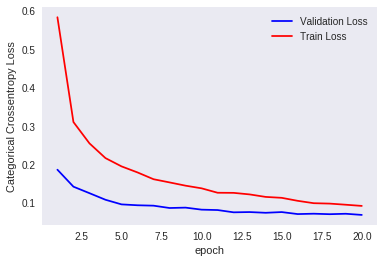

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


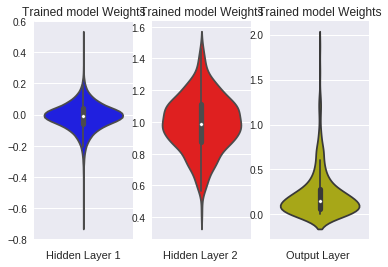

In [0]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 2. MLP + Dropout + AdamOptimizer + BatchNormalization

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 1.0102 - acc: 0.6851 - val_loss: 0.2695 - val_acc: 0.9222
Epoch 2/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.4758 - acc: 0.8589 - val_loss: 0.2030 - val_acc: 0.9382
Epoch 3/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.3715 - acc: 0.8924 - val_loss: 0.1742 - val_acc: 0.9469
Epoch 4/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.3160 - acc: 0.9101 - val_loss: 0.1541 - val_acc: 0.9535
Epoch 5/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.2788 - acc: 0.9213 - val_loss: 0.1403 - val_acc: 0.9582
Epoch 6/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.2559 - acc: 0.9277 - val_loss: 0.1247 - val_acc: 0.9645
Epoch 7/20
60000/60000 [==============================] - 6s 99us/step - loss: 0.2310 - acc: 0.9363 - val_loss: 0.1170 - v

Test score: 0.08211442540470744
Test accuracy: 0.9771


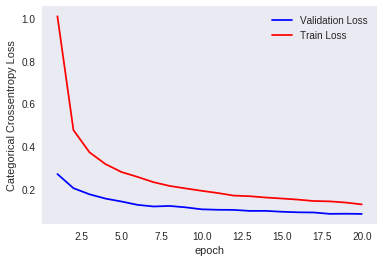

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
ptab.add_row(["784-256-128-64-10", score[1], score[0]])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


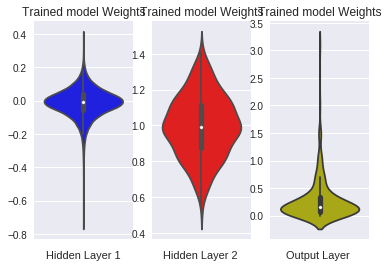

In [0]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

# 3. MLP + Dropout + AdamOptimizer + BatchNormalization

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout

model_drop = Sequential()

model_drop.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.039, seed=None)))
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(364, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(56, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.55, seed=None)) )
model_drop.add(BatchNormalization())
model_drop.add(Dropout(0.5))

model_drop.add(Dense(output_dim, activation='softmax'))

model_drop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 10s 161us/step - loss: 1.3014 - acc: 0.5782 - val_loss: 0.3161 - val_acc: 0.9139
Epoch 2/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.5599 - acc: 0.8311 - val_loss: 0.2104 - val_acc: 0.9356
Epoch 3/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.4079 - acc: 0.8835 - val_loss: 0.1735 - val_acc: 0.9488
Epoch 4/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.3315 - acc: 0.9059 - val_loss: 0.1455 - val_acc: 0.9560
Epoch 5/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.2933 - acc: 0.9175 - val_loss: 0.1356 - val_acc: 0.9627
Epoch 6/20
60000/60000 [==============================] - 8s 133us/step - loss: 0.2571 - acc: 0.9299 - val_loss: 0.1240 - val_acc: 0.9642
Epoch 7/20
60000/60000 [==============================] - 8s 140us/step - loss: 0.2317 - acc: 0.9383 - val_loss: 0.1135 -

Test score: 0.0795607059971313
Test accuracy: 0.9788


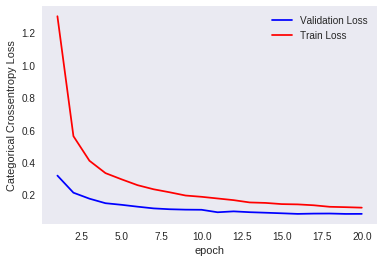

In [0]:
score = model_drop.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
ptab.add_row(["784-512-364-128-56-10", score[1], score[0]])

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


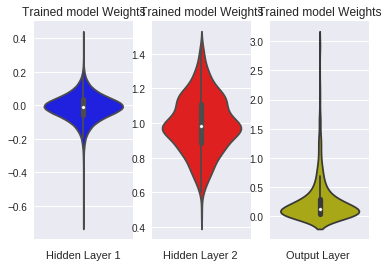

In [0]:
w_after = model_drop.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [0]:
print(ptab)

+-----------------------+---------------+---------------------+
|       Model name      | test accuracy |    test log-loss    |
+-----------------------+---------------+---------------------+
|     784-364-52-10     |     0.9801    | 0.06959077430961189 |
|   784-256-128-64-10   |     0.9771    | 0.08211442540470744 |
| 784-512-364-128-56-10 |     0.9788    |  0.0795607059971313 |
+-----------------------+---------------+---------------------+
